# Near-Antarctic class: profile distribution

## Load modules

In [1]:
# modules in this package
import load_and_preprocess as lp
import plot_tools as pt
import file_io as io
import density
import xarray
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import xarray as xr
import numpy as np
# os tools
import os.path

# warnings setup
import warnings
warnings.filterwarnings('ignore')

## Set parameters

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forPaperRevisions/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)

# single class from previous effort to sub-classify
# don't forget 0 indexing
myClass=1

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0

# ranges
lon_range = (lon_min, lon_max)
lat_range = (lat_min, lat_max)
depth_range = (zmin, zmax)

# temperature and salinity ranges for plotting
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)
sig0range = (26.6, 28.0)

# font size for plotting
fs = 18

## Data loading and plotting

In [3]:
# load single class (just the Weddell One)
profiles_antarctic = lp.load_single_class(classified_data_location, selected_class=myClass)

# take a look at the xarray dataset
profiles_antarctic

load_and_preprocess.load_single_class
----> single-class profiles loaded


<xarray.Dataset>
Dimensions:        (profile: 28397, depth: 21, depth_highz: 50, sig0_levs: 100)
Coordinates:
  * profile        (profile) int64 13 14 15 16 ... 142282 142301 142320 142330
    lon            (profile) float64 ...
    lat            (profile) float64 ...
  * depth          (depth) float64 20.0 40.0 60.0 80.0 ... 820.0 910.0 1e+03
    time           (profile) datetime64[ns] ...
    year           (profile) int64 ...
    month          (profile) int64 ...
  * depth_highz    (depth_highz) float64 20.0 40.0 60.0 ... 960.0 980.0 1e+03
  * sig0_levs      (sig0_levs) float64 22.66 22.72 22.77 ... 27.86 27.91 27.97
Data variables: (12/13)
    prof_date      (profile) float64 ...
    prof_YYYYMMDD  (profile) float64 ...
    prof_HHMMSS    (profile) float64 ...
    prof_T         (profile, depth) float64 ...
    prof_S         (profile, depth) float64 ...
    sig0           (profile, depth) float64 ...
    ...             ...
    prof_CT        (profile, depth) float64 ...
    ct_on_highz    (profile, depth_highz) float64 ...
    sa_on_highz    (profile, depth_highz) float64 ...
    sig0_on_highz  (profile, depth_highz) float64 ...
    ct_on_sig0     (profile, sig0_levs) float64 ...
    sa_on_sig0     (profile, sig0_levs) float64 ...

## Profile locations

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


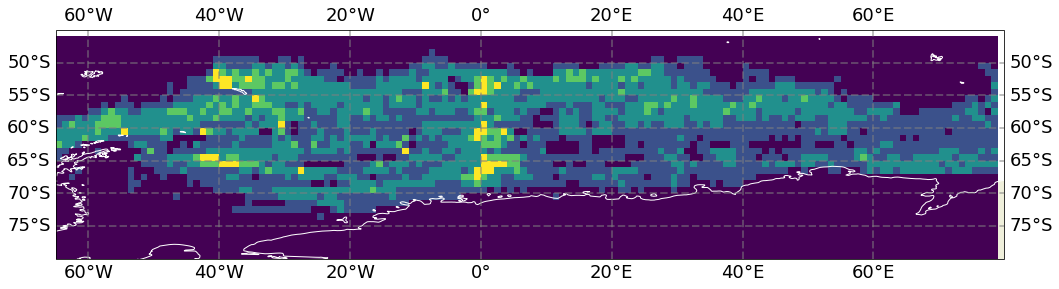

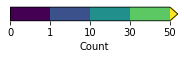

In [4]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, profiles_antarctic, 
                                       lon_range, lat_range, 
                                       source='all', 
                                       bounds=[0, 1, 10, 30, 50],                            
                                       binsize=1, vmax=50)

## Profile distribution by year 

In [5]:
ploc

'plots/plots_WeddellClassOnly_top1000m_K04_forPaperRevisions/'

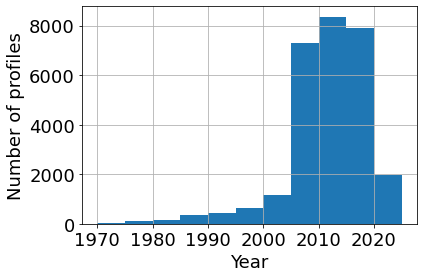

In [6]:
# histogram of distribution by year
#xr.plot.hist(profiles_antarctic.year, bins=np.arange(profiles_antarctic.year.min(), profiles_antarctic.year.max()+1))
bins=[1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025]
xr.plot.hist(profiles_antarctic.year, bins=bins)
plt.xlabel('Year', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
plt.xticks([1970,1980,1990,2000,2010,2020])
plt.grid(visible=True)
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc+'WeddellOnly_hist_byYear.png',bbox_inches='tight')
plt.savefig(ploc+'WeddellOnly_hist_byYear.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Profile distribution by month

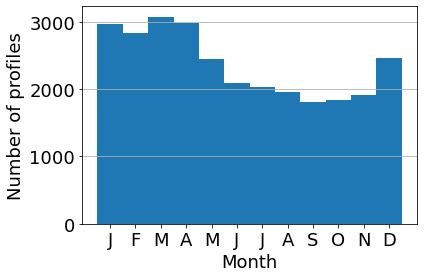

In [7]:
# histogram of distribution by month
xr.plot.hist(profiles_antarctic.month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.xlabel('Month', fontsize=fs)
plt.ylabel('Number of profiles', fontsize=fs)
ms = ['J','F','M','A','M','J','J','A','S','O','N','D'];
plt.xticks(np.arange(1.5, 13.5, step=1), ms)
plt.grid(visible=True, axis='y')
plt.tick_params(axis='x', labelsize=fs)
plt.tick_params(axis='y', labelsize=fs)
plt.savefig(ploc+'WeddellOnly_hist_byMonth.png',bbox_inches='tight')
plt.savefig(ploc+'WeddellOnly_hist_byMonth.pdf',bbox_inches='tight')
plt.show()
plt.close()

In [8]:
profiles_antarctic.month.min()

<xarray.DataArray 'month' ()>
array(1)

## Temperature, salinity, and density structure

plot_tools.plot_many_profiles


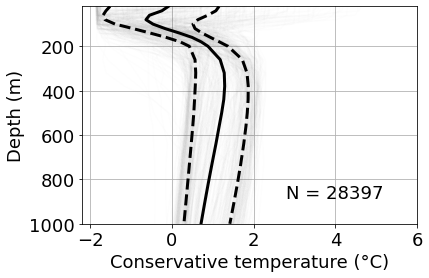

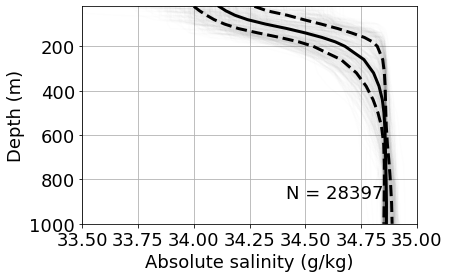

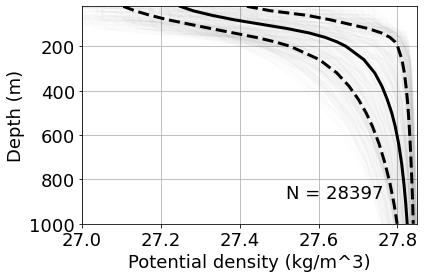

In [9]:
# make the "all profiles" plot
pt.plot_many_profiles(ploc, profiles_antarctic, frac = 0.10,
                      zmin = zmin, zmax = zmax,
                      Tmin = Trange[0], Tmax = Trange[1],
                      Smin = Srange[0], Smax = Srange[1],
                      sig0min = 27.0, sig0max = 27.85,
                      alpha = 0.01, modStr = '',
                      colorVal = 'black', fs = fs)

## Profile locations by season

In [10]:
def add_season_coordinate(dfp):
    
    import xarray as xr
    
    nsize = dfp.profile.size
    month = dfp.month.values
    season = np.zeros((nsize,), dtype='int')
    
    # assign season based on the month (1=DJF, 2=MAM, 3=JJA, 4=SON)
    for i in range(nsize):
        if (month[i]==12 or month[i]==1 or month[i]==2):
            season[i] = 1
        elif (month[i]==3 or month[i]==4 or month[i]==5):
            season[i] = 2
        elif (month[i]==6 or month[i]==7 or month[i]==8):
            season[i] = 3
        elif (month[i]==9 or month[i]==10 or month[i]==11):
            season[i] = 4
        else:
            season[i] = None

    # add season to DataArray
    dseason = xr.DataArray(season, dims=['profile'])
    dfp['season'] = dseason
    dfp = dfp.set_coords({'season'})
    
    return dfp

In [11]:
dfp = add_season_coordinate(profiles_antarctic)
dfp

<xarray.Dataset>
Dimensions:        (profile: 28397, depth: 21, depth_highz: 50, sig0_levs: 100)
Coordinates:
  * profile        (profile) int64 13 14 15 16 ... 142282 142301 142320 142330
    lon            (profile) float64 -26.44 -22.37 -17.38 ... 53.09 53.33 53.76
    lat            (profile) float64 -55.98 -56.81 -57.51 ... -58.46 -58.59
  * depth          (depth) float64 20.0 40.0 60.0 80.0 ... 820.0 910.0 1e+03
    time           (profile) datetime64[ns] 1973-01-11T12:00:00 ... 2020-10-1...
    year           (profile) int64 1973 1973 1973 1973 ... 2020 2020 2020 2020
    month          (profile) int64 1 1 1 1 1 1 1 1 1 1 ... 8 8 8 9 9 9 9 9 10 10
  * depth_highz    (depth_highz) float64 20.0 40.0 60.0 ... 960.0 980.0 1e+03
  * sig0_levs      (sig0_levs) float64 22.66 22.72 22.77 ... 27.86 27.91 27.97
    season         (profile) int64 1 1 1 1 1 1 1 1 1 1 1 ... 3 3 3 4 4 4 4 4 4 4
Data variables: (12/13)
    prof_date      (profile) float64 7.206e+05 7.206e+05 ... 7.381e+05 7.381e+05
    prof_YYYYMMDD  (profile) float64 1.973e+07 1.973e+07 ... 2.02e+07 2.02e+07
    prof_HHMMSS    (profile) float64 1.2e+05 1.2e+05 ... 4.45e+04 5.19e+04
    prof_T         (profile, depth) float64 ...
    prof_S         (profile, depth) float64 ...
    sig0           (profile, depth) float64 ...
    ...             ...
    prof_CT        (profile, depth) float64 ...
    ct_on_highz    (profile, depth_highz) float64 ...
    sa_on_highz    (profile, depth_highz) float64 ...
    sig0_on_highz  (profile, depth_highz) float64 ...
    ct_on_sig0     (profile, sig0_levs) float64 ...
    sa_on_sig0     (profile, sig0_levs) float64 ...

In [12]:
bounds_seasonal = [0, 1, 10, 20, 30]

### DJF (Austral Summer)

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


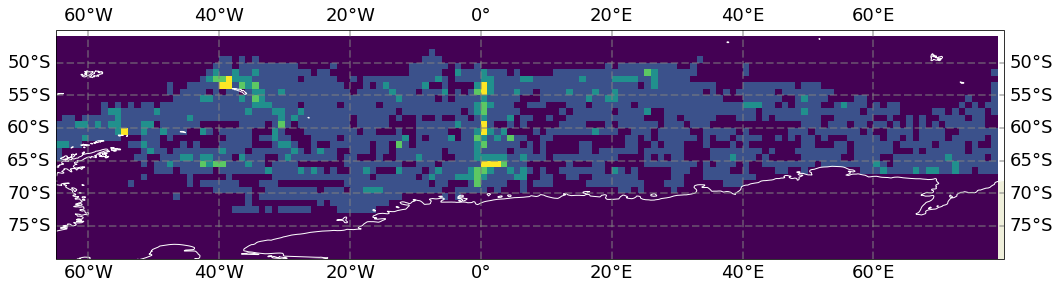

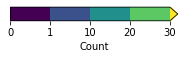

In [13]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, 
                                       dfp.where(dfp.season==1, drop=True), 
                                       lon_range, 
                                       lat_range, 
                                       descrip='all_DJF', 
                                       bounds=bounds_seasonal,
                                       binsize=1, 
                                       vmax=20)

### MAM (Austral Autumn)

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


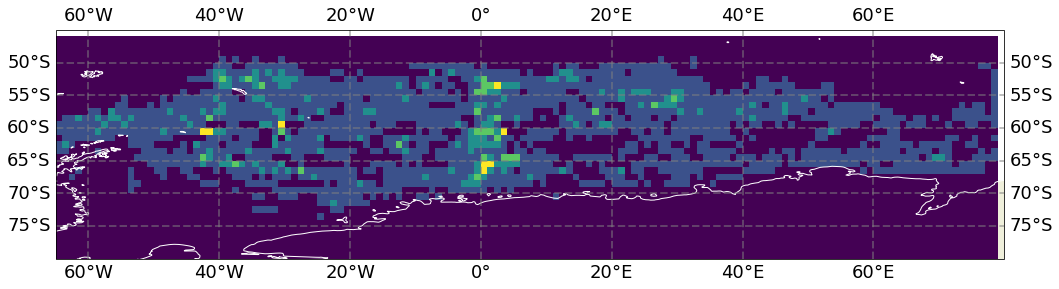

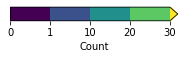

In [14]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, 
                                       dfp.where(dfp.season==2, drop=True), 
                                       lon_range, 
                                       lat_range, 
                                       descrip='all_MAM', 
                                       bounds=bounds_seasonal,
                                       binsize=1, 
                                       vmax=20)

### JJA (Austral Winter)

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


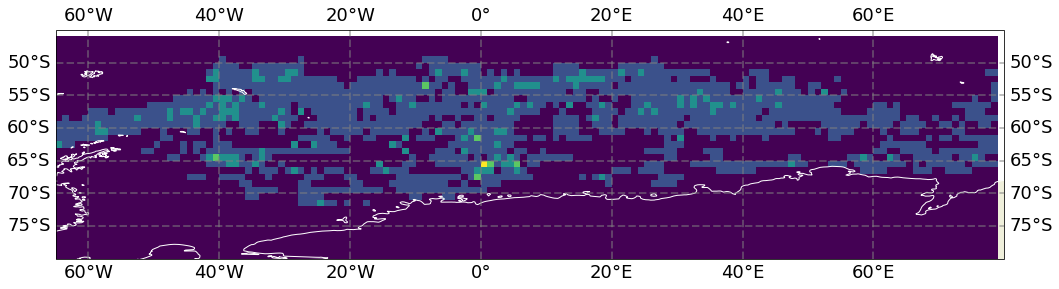

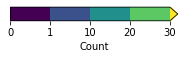

In [15]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, 
                                       dfp.where(dfp.season==3, drop=True), 
                                       lon_range, 
                                       lat_range, 
                                       descrip='all_JJA', 
                                       bounds=bounds_seasonal,
                                       binsize=1, 
                                       vmax=20)

### SON (Austral Spring)

plot_tools.plot_histogram_of_profile_locations
file_io.load_bathymetry


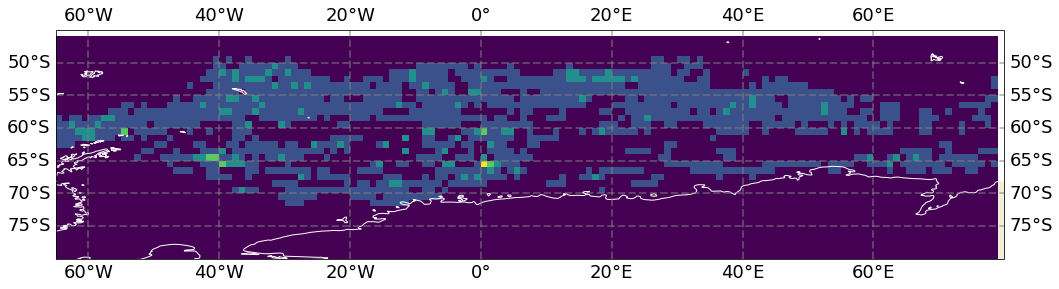

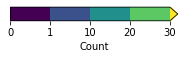

In [16]:
# histogram of profile locations
pt.plot_histogram_of_profile_locations(ploc, 
                                       dfp.where(dfp.season==4, drop=True), 
                                       lon_range, 
                                       lat_range, 
                                       descrip='all_SON', 
                                       bounds=bounds_seasonal,
                                       binsize=1, 
                                       vmax=20)